## Import Libraries 

In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score

## Load Dataset 

In [2]:
dataset=pd.read_csv("https://raw.githubusercontent.com/leenaali1114/Titanic-Dataset/main/Titanic_Dataset.csv")

In [3]:
dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## EDA

In [4]:
dataset.shape

(1309, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## Data Engineering 

In [7]:
dataset=dataset.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)

In [8]:
dataset


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,NaN,0,0,8.0500,S


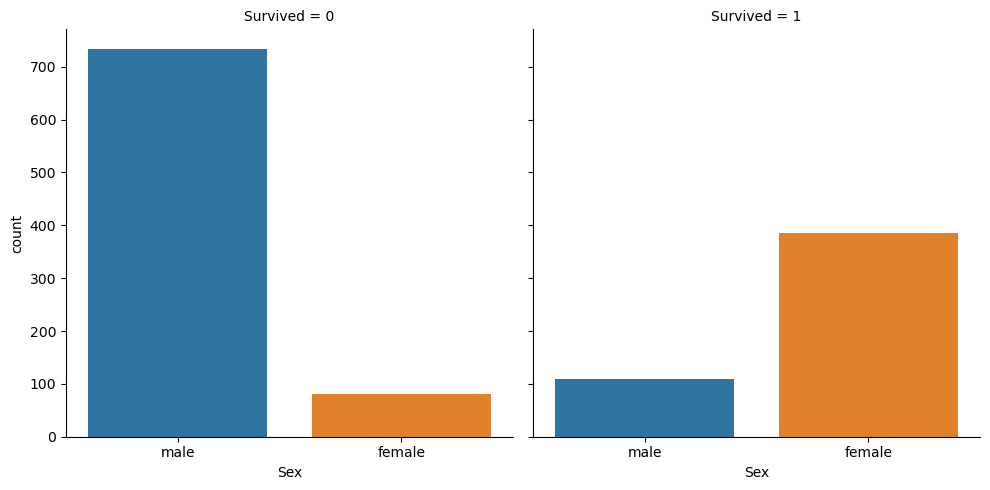

In [9]:
sns.catplot(data=dataset , x='Sex', col='Survived', kind='count')

In [10]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [11]:
dataset=dataset.drop(['Fare'],axis=1)

In [12]:
dataset.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [13]:
mean_age = dataset['Age'].mean()
mean_age
dataset["Age"].fillna(mean_age, inplace=True)

In [14]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [15]:
dataset.dropna(subset=['Embarked'], inplace=True)

In [16]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [18]:
dataset.groupby('Survived').size()

Survived
0    815
1    492
dtype: int64

In [19]:
sd= {"male":0,"female":1}
dataset['Sex'] = dataset['Sex'].map(sd)

In [20]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.000000,1,0,S
1,1,1,1,38.000000,1,0,C
2,1,3,1,26.000000,0,0,S
3,1,1,1,35.000000,1,0,S
4,0,3,0,35.000000,0,0,S
...,...,...,...,...,...,...,...
1304,0,3,0,29.881138,0,0,S
1305,1,1,1,39.000000,0,0,C
1306,0,3,0,38.500000,0,0,S
1307,0,3,0,29.881138,0,0,S


In [21]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
s= {"S":0,"C":1,"Q":2}
dataset['Embarked'] = dataset['Embarked'].map(s)

In [23]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.000000,1,0,0
1,1,1,1,38.000000,1,0,1
2,1,3,1,26.000000,0,0,0
3,1,1,1,35.000000,1,0,0
4,0,3,0,35.000000,0,0,0
...,...,...,...,...,...,...,...
1304,0,3,0,29.881138,0,0,0
1305,1,1,1,39.000000,0,0,1
1306,0,3,0,38.500000,0,0,0
1307,0,3,0,29.881138,0,0,0


In [24]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
ds = dataset[(dataset['Survived']==0)] 
dsa = dataset[(dataset['Survived']==1)] 

dsa_upsampled = resample(dsa, 
                                 replace=True,    # sample with replacement
                                 n_samples= 815, # to match majority class
                                 random_state=42)  # reproducible results


# Combine majority class with upsampled minority class
dataset = pd.concat([ds,dsa_upsampled])

In [25]:
dataset.groupby('Survived').size()

Survived
0    815
1    815
dtype: int64

## Data Modeling and Evaluation 

In [26]:
x = dataset.iloc[:,1:7].values
y = dataset.iloc[:,0].values

In [27]:
x                                 

array([[ 3.        ,  0.        , 22.        ,  1.        ,  0.        ,
         0.        ],
       [ 3.        ,  0.        , 35.        ,  0.        ,  0.        ,
         0.        ],
       [ 3.        ,  0.        , 29.88113767,  0.        ,  0.        ,
         2.        ],
       ...,
       [ 3.        ,  1.        , 22.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.        ,  1.        , 22.        ,  1.        ,  2.        ,
         1.        ],
       [ 1.        ,  1.        , 32.        ,  0.        ,  0.        ,
         1.        ]])

In [28]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [30]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (1141, 6)
y_train:  (1141,)
x_test:  (489, 6)
y_test:  (489,)


# Logistic Regression

In [31]:
model_lr = LogisticRegression(max_iter = 600)

In [32]:
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=600)

In [33]:
y_pred_lr = model_lr.predict(x_test)

In [34]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.8711656441717791


# K Nearest Nieghbours Classifiers

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
model_knn = KNeighborsClassifier()

In [37]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred_knn = model_knn.predict(x_test)

In [39]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.8139059304703476


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model_dt = DecisionTreeClassifier()

In [42]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred_dt = model_dt.predict(x_test)

In [44]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.8609406952965235


# Naive Bayes Classifier

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
model_nb = GaussianNB()

In [47]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [48]:
y_pred_nb = model_nb.predict(x_test)

In [49]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.8445807770961146


# Support Vector Machine

In [50]:
from sklearn.svm import SVC

In [51]:
model_svc = SVC(gamma='auto')

In [52]:
model_svc.fit(x_train,y_train)

SVC(gamma='auto')

In [53]:
y_pred_svc = model_nb.predict(x_test)

In [54]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.8445807770961146


# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [57]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [58]:
y_pred_rf = model_nb.predict(x_test)

In [59]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.8445807770961146


# Prediction

In [60]:
Xnew = [[3,1,59.0,1,0,0]]

ynew = model_lr.predict(Xnew)

print(ynew)

[1]


In [61]:
dataset


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.000000,1,0,0
4,0,3,0,35.000000,0,0,0
5,0,3,0,29.881138,0,0,2
6,0,1,0,54.000000,0,0,0
7,0,3,0,2.000000,3,1,0
...,...,...,...,...,...,...,...
599,1,1,0,49.000000,1,0,1
865,1,2,1,42.000000,0,0,0
376,1,3,1,22.000000,0,0,0
608,1,2,1,22.000000,1,2,1


In [62]:
x_test

array([[ 3.        ,  1.        , 29.88113767,  0.        ,  0.        ,
         2.        ],
       [ 3.        ,  0.        , 19.        ,  0.        ,  0.        ,
         0.        ],
       [ 3.        ,  0.        , 25.        ,  0.        ,  0.        ,
         0.        ],
       ...,
       [ 3.        ,  0.        , 43.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.        ,  1.        , 26.        ,  1.        ,  1.        ,
         0.        ],
       [ 1.        ,  1.        , 36.        ,  0.        ,  0.        ,
         1.        ]])

In [63]:
y_test

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,